# Sentiment Analysis on Topics

### Goal: sentiment analysis on each topic discussed in a review and rating the product accordingly

#### Importing Libraries

In [113]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pprint

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harika_pradeep/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
#Loading the file with dominent topic and topic contribution percentage on each sentence. 
#This data frame is saved from topic distribution notebook file.
df = pd.read_csv("/Users/harika_pradeep/Downloads/df_topic_sents_keywords.csv", index_col = 0)

In [4]:
df.shape

(300677, 4)

In [5]:
df.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,5.0,0.2258,"rice, quiet, combined, hard, owned, entire, be...","['excited', 'soon', 'followed', 'manual', 'set..."
1,5.0,0.1607,"rice, quiet, combined, hard, owned, entire, be...","['ended', 'best', 'texture', 'brown', 'jasmine..."
2,5.0,0.1852,"rice, quiet, combined, hard, owned, entire, be...","['plus', 'aroma', 'stayed', 'rice', 'really', ..."
3,5.0,0.1967,"rice, quiet, combined, hard, owned, entire, be...","['quietest', 'rice', 'cooker', 'pressure', 'co..."
4,5.0,0.1303,"rice, quiet, combined, hard, owned, entire, be...","['quiet', 'musical', 'beeping', 'opening', 'cl..."
5,9.0,0.1250,"perform, searching, user, cooker, mild, bistek...","['tell', 'except', 'display', 'front', 'metal'..."
6,6.0,0.1379,"vegetarian, cream, exceeded_expectation, combi...","['tell', 'cooking', 'time', 'ended', 'hear', '..."
7,1.0,0.1259,"slightly, cooker, preparation, fence, simutane...","['automatic', 'switch', 'warm', 'holding', 'ni..."
8,1.0,0.1111,"slightly, cooker, preparation, fence, simutane...","['condensation', 'catcher', 'back', 'needed']"
9,1.0,0.1153,"slightly, cooker, preparation, fence, simutane...","['everything', 'stayed', 'inside']"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300677 entries, 0 to 300676
Data columns (total 4 columns):
Dominant_Topic       300677 non-null float64
Perc_Contribution    300677 non-null float64
Topic_Keywords       300677 non-null object
0                    300677 non-null object
dtypes: float64(2), object(2)
memory usage: 11.5+ MB


In [7]:
# Setting the coloumns names adding document number for each sentence
df_dominant_topic = df.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [8]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.2258,"rice, quiet, combined, hard, owned, entire, be...","['excited', 'soon', 'followed', 'manual', 'set..."
1,1,5.0,0.1607,"rice, quiet, combined, hard, owned, entire, be...","['ended', 'best', 'texture', 'brown', 'jasmine..."
2,2,5.0,0.1852,"rice, quiet, combined, hard, owned, entire, be...","['plus', 'aroma', 'stayed', 'rice', 'really', ..."
3,3,5.0,0.1967,"rice, quiet, combined, hard, owned, entire, be...","['quietest', 'rice', 'cooker', 'pressure', 'co..."
4,4,5.0,0.1303,"rice, quiet, combined, hard, owned, entire, be...","['quiet', 'musical', 'beeping', 'opening', 'cl..."
5,5,9.0,0.1250,"perform, searching, user, cooker, mild, bistek...","['tell', 'except', 'display', 'front', 'metal'..."
6,6,6.0,0.1379,"vegetarian, cream, exceeded_expectation, combi...","['tell', 'cooking', 'time', 'ended', 'hear', '..."
7,7,1.0,0.1259,"slightly, cooker, preparation, fence, simutane...","['automatic', 'switch', 'warm', 'holding', 'ni..."
8,8,1.0,0.1111,"slightly, cooker, preparation, fence, simutane...","['condensation', 'catcher', 'back', 'needed']"
9,9,1.0,0.1153,"slightly, cooker, preparation, fence, simutane...","['everything', 'stayed', 'inside']"


In [9]:
df_dominant_topic.columns

Index(['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords',
       'Text'],
      dtype='object')

#### Exploring just  topics and keywords in the topics

In [10]:
df_topics =df_dominant_topic[['Dominant_Topic', 'Keywords']]

In [11]:
df_topics.shape

(300677, 2)

In [12]:
df_topics.head(10)

,Dominant_Topic,Keywords
0,5.0,"rice, quiet, combined, hard, owned, entire, be..."
1,5.0,"rice, quiet, combined, hard, owned, entire, be..."
2,5.0,"rice, quiet, combined, hard, owned, entire, be..."
3,5.0,"rice, quiet, combined, hard, owned, entire, be..."
4,5.0,"rice, quiet, combined, hard, owned, entire, be..."
5,9.0,"perform, searching, user, cooker, mild, bistek..."
6,6.0,"vegetarian, cream, exceeded_expectation, combi..."
7,1.0,"slightly, cooker, preparation, fence, simutane..."
8,1.0,"slightly, cooker, preparation, fence, simutane..."
9,1.0,"slightly, cooker, preparation, fence, simutane..."


In [13]:
df_topics.drop_duplicates(keep='first',inplace=True)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_topics

,Dominant_Topic,Keywords
0,5.0,"rice, quiet, combined, hard, owned, entire, be..."
5,9.0,"perform, searching, user, cooker, mild, bistek..."
6,6.0,"vegetarian, cream, exceeded_expectation, combi..."
7,1.0,"slightly, cooker, preparation, fence, simutane..."
11,0.0,"count, hate, changing, debating, cooker, addic..."
26,3.0,"hulking, needed, tomato, deglazing, musical, p..."
54,8.0,"super, read_manual, meat, prep, southpaw, hard..."
59,7.0,"automates, macerated, drain, long, button, fas..."
74,2.0,"channel, handy, explained, update, worth_every..."
80,4.0,"handle, quiet, immediately, hour, continues, u..."


In [15]:
df_topics.sort_values(['Dominant_Topic'],inplace=True)

/Users/harika_pradeep/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_topics.reset_index(drop=True,inplace=True)

In [17]:
pd.set_option('display.max_colwidth', -1)

In [18]:
df_topics

,Dominant_Topic,Keywords
0,0.0,"count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking"
1,1.0,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly"
2,2.0,"channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce"
3,3.0,"hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money"
4,4.0,"handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular"
5,5.0,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe"
6,6.0,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher"
7,7.0,"automates, macerated, drain, long, button, fast, curious, unnecessary, attempt, capacity"
8,8.0,"super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck"
9,9.0,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically"


#### Labeling Topics

##### Understanding the words in the topics and labeling them with the possible single word.
Topic 0: count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking : Possibly "Logivity"  <br> Topic 1: slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly : Possibly "Portability" <br> Topic 2: channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce : Possibly "Regular-Use" <br> Topic 3: hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money : Possibly "Price_worthy"  <br> Topic 4: handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular : Possibly "Performance" <br> Topic 5: rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe : Possibly "Options"  <br> Topic 6: vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher : Possibly "Time_saving" <br> Topic 7: automates, macerated, drain, long, button, fast, curious, unnecessary, attempt, capacity : Possibly "Quality" <br> Topic 8: super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck : Possibly "Instructional" <br> Topic 9: perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically : Possibly "Recipie_modes"

In [30]:
#Now labeling in actual df_dominant_topic dataframe.
df_dominant_topic = df_dominant_topic.replace({'Dominant_Topic': {0.0: 'Logivity', 1.0: 'Portability', 
                                                                  2.0: 'Regular-Use', 3.0: 'Price_worthy', 
                                                                  4.0: 'Performance', 5.0: 'Options', 6.0: 'Time_saving', 
                                                                  7.0: 'Quality', 8.0: 'Instructional', 
                                                                  9.0: 'Recipie_modes'}})

In [31]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']"
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']"
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']"
3,3,Options,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']"
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']"


#### Merging this dataframe with orignal sentences dataframe based on index

In [32]:
df_sent = pd.read_csv("/Users/harika_pradeep/Downloads/top_25_sents.csv", index_col=0)

In [33]:
df_sent.head()

,asin,sentences
0,B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button
1,B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice
2,B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually"
3,B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one)
4,B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time


In [34]:
df_sent.shape

(300677, 2)

#### Merging df_sent (sentences for each product) with df_dominent_topic (that has topic distribution per text) 

In [35]:
# Merge two Dataframes on index of both the dataframes
mergedDf = df_dominant_topic.merge(df_sent, left_index=True, right_index=True)

In [36]:
mergedDf.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually"
3,3,Options,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']",B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one)
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']",B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time


In [37]:
mergedDf.describe()

,Document_No,Topic_Perc_Contrib
count,300677.000000,300677.000000
mean,150338.000000,0.134570
std,86798.117782,0.028719
min,0.000000,0.100000
25%,75169.000000,0.115400
50%,150338.000000,0.129600
75%,225507.000000,0.148100
max,300676.000000,0.754300


In [38]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300677 entries, 0 to 300676
Data columns (total 7 columns):
Document_No           300677 non-null int64
Dominant_Topic        300677 non-null object
Topic_Perc_Contrib    300677 non-null float64
Keywords              300677 non-null object
Text                  300677 non-null object
asin                  300677 non-null object
sentences             265695 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.1+ MB


In [39]:
mergedDf.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences
300667,300667,Time_saving,0.1407,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['picture', 'people', 'posted', 'trash', 'mess', 'dog', 'make', 'merely', 'solidified', 'reason', 'never', 'owning']",B00T6TKYPC,The pictures other people posted of the trash messes their dogs make merely solidified my reason for never owning one
300668,300668,Portability,0.1321,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['trash', 'fault', 'fault']",B00T6TKYPC,"That's not the trash can's fault, that's those bad dog's fault"
300669,300669,Performance,0.1132,"handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular","['invest', 'crate', 'obedience', 'school']",B00T6TKYPC,Invest in a crate and obedience school
300670,300670,Recipie_modes,0.1176,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['trash', 'problem']",B00T6TKYPC,The trash can isn't the problem
300671,300671,Instructional,0.1235,"super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck","['well', 'made', 'quality', 'trash']",B00T6TKYPC,"This is a very well made, quality trash can"
300672,300672,Regular-Use,0.1720,"channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce","['recieved', 'saturday', 'today', 'wednesday', 'first', 'still', 'full', 'love', 'love', 'love', 'person', 'love', 'trash', 'trash', 'well', 'good', 'size', 'great', 'take', 'trash', 'every', 'good', 'size', 'great']",B00T6TKYPC,"I recieved this Saturday, today is Wednesday, and the first bag still isn't full! Love, love, love this can! //Not a dog person, love this trash can! ** This trash can does its job well! It is of good size, which is great because now I don't have to take out the trash every day! //It is of good size, which is great because now I don't"
300673,300673,Logivity,0.1000,"count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking",[],B00T6TKYPC,NaN
300674,300674,Logivity,0.1000,"count, hate, changing, debating, cooker, addict, posted, sushi_rice, faded, picking",[],B00T6TKYPC,NaN
300675,300675,Recipie_modes,0.1152,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['take', 'trash', 'never', 'give']",B00T6TKYPC,** It takes my trash and never gives me lip
300676,300676,Recipie_modes,0.1176,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['trash', 'taker']",B00T6TKYPC,//Trash Taker


In [40]:
#Dropping null values on sentences
mergedDf.dropna(axis=0, how='any', inplace = True)

In [41]:
mergedDf.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences
300665,300665,Time_saving,0.1409,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['good', 'value', 'everyone', 'home', 'year', 'happy', 'trash']",B00T6TKYPC,"//Good value ** Everyone in my home, even my 4 year old son, is VERY happy with this trash can"
300666,300666,Recipie_modes,0.1132,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['lock', 'matter', 'home']",B00T6TKYPC,"I do NOT own a dog, so the lock doesn't matter in our home"
300667,300667,Time_saving,0.1407,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['picture', 'people', 'posted', 'trash', 'mess', 'dog', 'make', 'merely', 'solidified', 'reason', 'never', 'owning']",B00T6TKYPC,The pictures other people posted of the trash messes their dogs make merely solidified my reason for never owning one
300668,300668,Portability,0.1321,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['trash', 'fault', 'fault']",B00T6TKYPC,"That's not the trash can's fault, that's those bad dog's fault"
300669,300669,Performance,0.1132,"handle, quiet, immediately, hour, continues, uncooked, tomato, authentic, winter, regular","['invest', 'crate', 'obedience', 'school']",B00T6TKYPC,Invest in a crate and obedience school
300670,300670,Recipie_modes,0.1176,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['trash', 'problem']",B00T6TKYPC,The trash can isn't the problem
300671,300671,Instructional,0.1235,"super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck","['well', 'made', 'quality', 'trash']",B00T6TKYPC,"This is a very well made, quality trash can"
300672,300672,Regular-Use,0.1720,"channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce","['recieved', 'saturday', 'today', 'wednesday', 'first', 'still', 'full', 'love', 'love', 'love', 'person', 'love', 'trash', 'trash', 'well', 'good', 'size', 'great', 'take', 'trash', 'every', 'good', 'size', 'great']",B00T6TKYPC,"I recieved this Saturday, today is Wednesday, and the first bag still isn't full! Love, love, love this can! //Not a dog person, love this trash can! ** This trash can does its job well! It is of good size, which is great because now I don't have to take out the trash every day! //It is of good size, which is great because now I don't"
300675,300675,Recipie_modes,0.1152,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['take', 'trash', 'never', 'give']",B00T6TKYPC,** It takes my trash and never gives me lip
300676,300676,Recipie_modes,0.1176,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['trash', 'taker']",B00T6TKYPC,//Trash Taker


In [42]:
mergedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265695 entries, 0 to 300676
Data columns (total 7 columns):
Document_No           265695 non-null int64
Dominant_Topic        265695 non-null object
Topic_Perc_Contrib    265695 non-null float64
Keywords              265695 non-null object
Text                  265695 non-null object
asin                  265695 non-null object
sentences             265695 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 16.2+ MB


In [43]:
mergedDf.reset_index(drop = True)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually"
3,3,Options,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']",B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one)
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']",B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time
...,...,...,...,...,...,...,...
265690,300670,Recipie_modes,0.1176,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['trash', 'problem']",B00T6TKYPC,The trash can isn't the problem
265691,300671,Instructional,0.1235,"super, read_manual, meat, prep, southpaw, hard, sweet_potato, ruined, troubleshooting, chuck","['well', 'made', 'quality', 'trash']",B00T6TKYPC,"This is a very well made, quality trash can"
265692,300672,Regular-Use,0.1720,"channel, handy, explained, update, worth_every, caused, daily, release, complaint, tomato_sauce","['recieved', 'saturday', 'today', 'wednesday', 'first', 'still', 'full', 'love', 'love', 'love', 'person', 'love', 'trash', 'trash', 'well', 'good', 'size', 'great', 'take', 'trash', 'every', 'good', 'size', 'great']",B00T6TKYPC,"I recieved this Saturday, today is Wednesday, and the first bag still isn't full! Love, love, love this can! //Not a dog person, love this trash can! ** This trash can does its job well! It is of good size, which is great because now I don't have to take out the trash every day! //It is of good size, which is great because now I don't"
265693,300675,Recipie_modes,0.1152,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['take', 'trash', 'never', 'give']",B00T6TKYPC,** It takes my trash and never gives me lip


#### Applying sentiment intensity analyser on sentences

In [44]:
senti = SentimentIntensityAnalyzer()
mergedDf["sentiments"] = mergedDf["sentences"].apply(lambda x: senti.polarity_scores(x))
df_senti = pd.concat([mergedDf.drop(['sentiments'], axis=1), mergedDf['sentiments'].apply(pd.Series)], axis=1)

In [45]:
df_senti.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button,0.000,0.921,0.079,0.3400
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice,0.000,0.741,0.259,0.6369
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually",0.000,0.857,0.143,0.8016
3,3,Options,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']",B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one),0.079,0.830,0.090,0.0772
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']",B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time,0.000,1.000,0.000,0.0000
5,5,Recipie_modes,0.1250,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['tell', 'except', 'display', 'front', 'metal', 'part', 'touch', 'side']",B00FLYWNYQ,I couldn't tell it was on except the display was lit on the front and the metal part of the lid was hot to the touch (but not the sides),0.000,1.000,0.000,0.0000
6,6,Time_saving,0.1379,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['tell', 'cooking', 'time', 'ended', 'hear', 'chime', 'pressure', 'cycle', 'ended']",B00FLYWNYQ,"I could not tell when the cooking time ended, as I did not hear a chime when the pressure cycle ended",0.115,0.885,0.000,-0.2960
7,7,Portability,0.1259,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['automatic', 'switch', 'warm', 'holding', 'nice', 'timer', 'continues', 'count', 'know', 'long', 'food', 'holding']",B00FLYWNYQ,"The automatic switch to warm holding is very nice, and it has a timer that continues to count up so you know how long the food has been holding",0.000,0.839,0.161,0.6115
8,8,Portability,0.1111,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['condensation', 'catcher', 'back', 'needed']",B00FLYWNYQ,"There is a condensation catcher on the back, but it wasn't needed at all",0.000,1.000,0.000,0.0000
9,9,Portability,0.1153,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['everything', 'stayed', 'inside']",B00FLYWNYQ,Everything stayed inside the pot,0.000,1.000,0.000,0.0000


#### Verifying Topics , keywords and actual sentence

In [46]:
print(df_senti.loc[[0]].values)

[[0 'Options' 0.2258
  'rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe'
  "['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']"
  'B00FLYWNYQ'
  'I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button'
  0.0 0.921 0.079 0.34]]


In [47]:
df_senti['compound'].describe()

count    265695.000000
mean     0.280127     
std      0.405754     
min     -0.974000     
25%      0.000000     
50%      0.318200     
75%      0.624900     
max      0.997200     
Name: compound, dtype: float64

In [118]:
#Printing most negative sentence 
df_senti.loc[df_senti['compound'] == -0.974000]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
26098,26098,Options,0.1375,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['pressure', 'angry', 'empty', 'uncooked', 'food', 'throw', 'disappointed', 'hate', 'worked', 'time', 'month']",B00FLYWNYQ,",NO PRESSURE!! I am SO angry !@@ now I have to empty all the uncooked food and throw it out and go out to eat! VERY DISAPPOINTED! //I hate it! The pot has worked only 3 times ** We've had it for about a month",0.393,0.607,0.0,-0.974,negative


In [120]:
#Printing most positive sentence 
df_senti.loc[df_senti['compound'] == 0.997200]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
20975,20975,Options,0.2022,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['always', 'scared', 'pressure', 'cooker', 'happy', 'purchase', 'glad', 'love', 'love', 'love', 'make', 'life', 'easier', 'life', 'easier', 'love', 'husband', 'brag', 'pressure_cooker', 'happy_purchase', 'life_easier', 'life_easier']",B00FLYWNYQ,"I was always scared of pressure cookers before, but I'm so happy with this purchase! //I'm so glad I did ** WOW! WOW! WOW! Love, love, love my IP! Makes life so much easier! //LIFE IS EASIER NOW!!!! ** I love this thing, even my husband brags about it",0.035,0.328,0.637,0.9972,positive


##### "Compound value is the normalized form of postive, negative and neutral score genrated by SentimentIntensityAnalyzer on each sentence of the reviews ranges between [-1, 1] . So labeling compund values to sentiments (positive negative and neutral). if compound is below 0 = negatve, above 0 = positive, 0 = neutral

In [48]:
df_senti['sentiment'] = 1

In [49]:
df_senti.loc[df_senti['compound'] <0,'sentiment']="negative"
df_senti.loc[df_senti['compound'] >0,'sentiment']="positive"
df_senti.loc[df_senti['compound'] ==0,'sentiment']="neutral"

In [51]:
#Printing first 5 negative sentences
df_senti[df_senti['compound'] <0].head ()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
6,6,Time_saving,0.1379,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['tell', 'cooking', 'time', 'ended', 'hear', 'chime', 'pressure', 'cycle', 'ended']",B00FLYWNYQ,"I could not tell when the cooking time ended, as I did not hear a chime when the pressure cycle ended",0.115,0.885,0.000,-0.2960,negative
24,24,Options,0.1154,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['tout', 'unit', 'whisper', 'quiet']",B00FLYWNYQ,"Just as it touts, this unit is whisper quiet",0.121,0.879,0.000,-0.0258,negative
26,26,Price_worthy,0.1111,"hulking, needed, tomato, deglazing, musical, productdon, kobacha, water, unit, worth_money","['elite', 'heavily', 'never', 'liked', 'tricky']",B00FLYWNYQ,"I used my Elite pc heavily, and never liked the tricky lid",0.183,0.704,0.113,-0.2235,negative
28,28,Portability,0.1398,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['like', 'bottom', 'elite', 'hard', 'clean', 'food', 'stuck', 'burnt']",B00FLYWNYQ,I also did not like how the bottom of my Elite pc is so hard to clean if foods are stuck/burnt,0.166,0.710,0.124,-0.0032,negative
30,30,Time_saving,0.1500,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['digital', 'pressure', 'cooker', 'storage', 'donate', 'church', 'give', 'away', 'need', 'pressure_cooker']",B00FLYWNYQ,"digital pressure cooker into storage, and will donate it to our church, or give it away, as I have no need for it",0.180,0.820,0.000,-0.5267,negative


In [52]:
#Printing first 5 positive sentences
df_senti[df_senti['compound'] >0].head ()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
0,0,Options,0.2258,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['excited', 'soon', 'followed', 'manual', 'setting', 'brown', 'rice', 'recipe', 'included', 'cookbook', 'instead', 'using', 'rice', 'program', 'button', 'brown_rice']",B00FLYWNYQ,I was excited to try this so as soon as I got it I followed the manual setting brown rice recipe in the included cookbook instead of using the rice program button,0.000,0.921,0.079,0.3400,positive
1,1,Options,0.1607,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['ended', 'best', 'texture', 'brown', 'jasmine', 'rice', 'jasmine_rice']",B00FLYWNYQ,I ended up with the best texture I've ever had in brown jasmine rice,0.000,0.741,0.259,0.6369,positive
2,2,Options,0.1852,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['plus', 'aroma', 'stayed', 'rice', 'really', 'fragrant', 'read', 'manual', 'figure', 'rice', 'program', 'work', 'well', 'super', 'simple', 'manually', 'read_manual']",B00FLYWNYQ,"Plus the aroma stayed in the pot, so the rice was really fragrant! I will have to read the manual to figure out how to use the rice program to see if it works as well, but it was super simple to just set it manually",0.000,0.857,0.143,0.8016,positive
3,3,Options,0.1967,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quietest', 'rice', 'cooker', 'pressure', 'cooker', 'seen', 'owned', 'separate', 'one', 'combined', 'cooker', 'like', 'rice_cooker', 'pressure_cooker']",B00FLYWNYQ,This is the quietest rice cooker or pressure cooker I've ever seen (I've owned separate ones and one that was a combined cooker like this one),0.079,0.830,0.090,0.0772,positive
7,7,Portability,0.1259,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['automatic', 'switch', 'warm', 'holding', 'nice', 'timer', 'continues', 'count', 'know', 'long', 'food', 'holding']",B00FLYWNYQ,"The automatic switch to warm holding is very nice, and it has a timer that continues to count up so you know how long the food has been holding",0.000,0.839,0.161,0.6115,positive


In [53]:
#Printing first 5 neutral sentences
df_senti[df_senti['compound'] == 0].head ()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,asin,sentences,neg,neu,pos,compound,sentiment
4,4,Options,0.1303,"rice, quiet, combined, hard, owned, entire, beeping, burn, pressure, recipe","['quiet', 'musical', 'beeping', 'opening', 'closing', 'tiny', 'whisper', 'steam', 'throughout', 'whole', 'cooking', 'time']",B00FLYWNYQ,There was only quiet musical beeping when opening and closing the lid and one tiny whisper of steam throughout the whole cooking time,0.0,1.0,0.0,0.0,neutral
5,5,Recipie_modes,0.1250,"perform, searching, user, cooker, mild, bistek, butter, elaborate, plan, specifically","['tell', 'except', 'display', 'front', 'metal', 'part', 'touch', 'side']",B00FLYWNYQ,I couldn't tell it was on except the display was lit on the front and the metal part of the lid was hot to the touch (but not the sides),0.0,1.0,0.0,0.0,neutral
8,8,Portability,0.1111,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['condensation', 'catcher', 'back', 'needed']",B00FLYWNYQ,"There is a condensation catcher on the back, but it wasn't needed at all",0.0,1.0,0.0,0.0,neutral
9,9,Portability,0.1153,"slightly, cooker, preparation, fence, simutaneously, egg, small, tinola, goodness, friendly","['everything', 'stayed', 'inside']",B00FLYWNYQ,Everything stayed inside the pot,0.0,1.0,0.0,0.0,neutral
12,12,Time_saving,0.1605,"vegetarian, cream, exceeded_expectation, combination, great, store, basic, veggie, fast, catcher","['thought', 'report', 'different', 'experience']",B00FLYWNYQ,Just thought I'd report my different experience,0.0,1.0,0.0,0.0,neutral


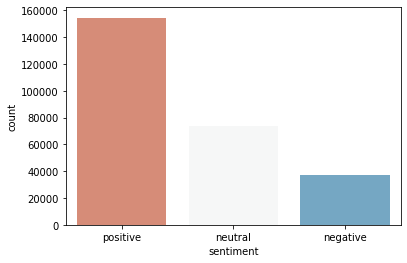

In [55]:
#Importing Seaborn and Matplotlib for graphical effects.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='sentiment', data=df_senti, palette='RdBu')
plt.xlabel('sentiment')
plt.show()

#### collect all the topics per product : check for positives and negatives

In [56]:
df_senti.shape

(265695, 12)

In [57]:
df_senti['asin'].unique().size

25

In [58]:
df_senti['asin'].unique()

array(['B00FLYWNYQ', 'B00COK3FD8', 'B009HVH4XO', 'B00NX47YP4',
       'B00902X68W', 'B00EINBSJ2', 'B009ZJ2M7G', 'B0091YYUAM',
       'B00JVLG2KG', 'B000YGEVMI', 'B00INRW7GC', 'B019D9HESO',
       'B00AYULZEQ', 'B00LV4W8BI', 'B007WQ9YNE', 'B000M8YMEU',
       'B002S52ZDU', 'B00EQT70QS', 'B000VENLF6', 'B00ARQVLGO',
       'B000BWZ7QO', 'B002KAPNA0', 'B00Q7EV29G', 'B0015TMHSI',
       'B00T6TKYPC'], dtype=object)

In [61]:
raw_data = {"asin":df_senti.asin.unique()}
#df_23['asin'] = df_senti.asin.unique()
#df_senti.loc[df_senti.asin=='asin'].value_counts ()
import numpy as np
[[raw_data.update({str(_i)+"_"+_j:25*[np.NaN]}) for _i in df_senti.Dominant_Topic.unique()] for _j in ["positive","negative","neutral"]]
product_sentiments = pd.DataFrame (raw_data)

In [63]:
product_sentiments

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Options_neutral,Recipie_modes_neutral,Time_saving_neutral,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral
0,B00FLYWNYQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00COK3FD8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B009HVH4XO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00NX47YP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00902X68W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,B00EINBSJ2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,B009ZJ2M7G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,B0091YYUAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,B00JVLG2KG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,B000YGEVMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
import re
for idx,rows in product_sentiments.iterrows():
    asin = rows['asin']
    for _i in rows.keys ():
        if _i == 'asin':
            continue
        _m = re.search ('([\w_-]+)_((?:positive|negative|neutral))',_i)
        dominant_topic, sentiment = _m.group(1),_m.group(2)
        product_sentiments.at[idx,_i] = df_senti.loc[(df_senti.asin==asin) & (df_senti.Dominant_Topic == dominant_topic) & (df_senti.sentiment == sentiment)].shape[0]/df_senti.loc[(df_senti.asin==asin) & (df_senti.Dominant_Topic == dominant_topic)].shape[0]

In [71]:
product_sentiments

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Options_neutral,Recipie_modes_neutral,Time_saving_neutral,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral
0,B00FLYWNYQ,0.540743,0.521017,0.525174,0.466079,0.271493,0.713043,0.689865,0.352941,0.839561,...,0.269780,0.335236,0.326843,0.345815,0.634777,0.169275,0.209715,0.449501,0.126335,0.465642
1,B00COK3FD8,0.494792,0.485961,0.493116,0.645600,0.415126,0.516129,0.719415,0.338235,0.868221,...,0.354167,0.395248,0.384230,0.240078,0.465546,0.313364,0.192819,0.397059,0.111714,0.437681
2,B009HVH4XO,0.502874,0.525849,0.455070,0.506410,0.358491,0.751730,0.717368,0.403636,0.806115,...,0.330460,0.302806,0.337181,0.278045,0.530522,0.121972,0.137001,0.341818,0.147325,0.300139
3,B00NX47YP4,0.424855,0.558906,0.489130,0.528044,0.361702,0.790801,0.703344,0.357724,0.851145,...,0.462428,0.339856,0.349034,0.324213,0.565012,0.158754,0.214671,0.483740,0.126590,0.503546
4,B00902X68W,0.520833,0.508333,0.479781,0.451791,0.600562,0.412162,0.662791,0.556509,0.812800,...,0.354167,0.316667,0.375956,0.352617,0.287348,0.432432,0.186047,0.290415,0.132000,0.389344
5,B00EINBSJ2,0.386667,0.513043,0.519173,0.521545,0.381119,0.384937,0.699069,0.545994,0.796978,...,0.500000,0.360870,0.356206,0.306092,0.519231,0.443515,0.155119,0.257110,0.142587,0.376596
6,B009ZJ2M7G,0.384181,0.497738,0.475839,0.423848,0.389807,0.649020,0.725561,0.360104,0.815608,...,0.514124,0.337858,0.326846,0.301603,0.498623,0.174127,0.152466,0.404145,0.139250,0.446855
7,B0091YYUAM,0.463087,0.527443,0.457839,0.447641,0.374663,0.594275,0.723473,0.376087,0.835955,...,0.412752,0.303882,0.315547,0.280783,0.491914,0.225719,0.140407,0.330435,0.120599,0.408416
8,B00JVLG2KG,0.421687,0.494681,0.424348,0.500000,0.413437,0.800000,0.626761,0.347826,0.842872,...,0.469880,0.303191,0.370435,0.310289,0.465116,0.105376,0.232394,0.373913,0.115505,0.259682
9,B000YGEVMI,0.442105,0.479167,0.422609,0.507109,0.390501,0.801706,0.638202,0.313043,0.841998,...,0.442105,0.312500,0.370435,0.287520,0.493404,0.093817,0.229213,0.373913,0.121305,0.259406


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [72]:
df_new = product_sentiments.copy()

In [101]:
positive_columns = [_i for _i in product_sentiments.columns if 'positive' in _i]
negative_columns = [_i for _i in product_sentiments.columns if 'negative' in _i]
neutral_columns = [_i for _i in product_sentiments.columns if 'neutral' in _i]
print(positive_columns)
print(negative_columns)
print(neutral_columns)

['Options_positive', 'Recipie_modes_positive', 'Time_saving_positive', 'Portability_positive', 'Logivity_positive', 'Price_worthy_positive', 'Instructional_positive', 'Quality_positive', 'Regular-Use_positive', 'Performance_positive']
['Options_negative', 'Recipie_modes_negative', 'Time_saving_negative', 'Portability_negative', 'Logivity_negative', 'Price_worthy_negative', 'Instructional_negative', 'Quality_negative', 'Regular-Use_negative', 'Performance_negative']
['Options_neutral', 'Recipie_modes_neutral', 'Time_saving_neutral', 'Portability_neutral', 'Logivity_neutral', 'Price_worthy_neutral', 'Instructional_neutral', 'Quality_neutral', 'Regular-Use_neutral', 'Performance_neutral']


In [105]:
df_new["Positive_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in positive_columns]) ,axis=1)
df_new["Negative_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in negative_columns]) ,axis=1)
df_new["Neutral_Sum"] = df_new.apply(lambda row: sum([row[_i] for _i in neutral_columns]) ,axis=1)

In [106]:
df_new

,asin,Options_positive,Recipie_modes_positive,Time_saving_positive,Portability_positive,Logivity_positive,Price_worthy_positive,Instructional_positive,Quality_positive,Regular-Use_positive,...,Portability_neutral,Logivity_neutral,Price_worthy_neutral,Instructional_neutral,Quality_neutral,Regular-Use_neutral,Performance_neutral,Positive_Sum,Negative_Sum,Neutral_Sum
0,B00FLYWNYQ,0.540743,0.521017,0.525174,0.466079,0.271493,0.713043,0.689865,0.352941,0.839561,...,0.345815,0.634777,0.169275,0.209715,0.449501,0.126335,0.465642,5.296047,1.371035,3.332918
1,B00COK3FD8,0.494792,0.485961,0.493116,0.645600,0.415126,0.516129,0.719415,0.338235,0.868221,...,0.240078,0.465546,0.313364,0.192819,0.397059,0.111714,0.437681,5.405581,1.302513,3.291906
2,B009HVH4XO,0.502874,0.525849,0.455070,0.506410,0.358491,0.751730,0.717368,0.403636,0.806115,...,0.278045,0.530522,0.121972,0.137001,0.341818,0.147325,0.300139,5.597406,1.575326,2.827268
3,B00NX47YP4,0.424855,0.558906,0.489130,0.528044,0.361702,0.790801,0.703344,0.357724,0.851145,...,0.324213,0.565012,0.158754,0.214671,0.483740,0.126590,0.503546,5.452176,1.019980,3.527844
4,B00902X68W,0.520833,0.508333,0.479781,0.451791,0.600562,0.412162,0.662791,0.556509,0.812800,...,0.352617,0.287348,0.432432,0.186047,0.290415,0.132000,0.389344,5.460481,1.422526,3.116992
5,B00EINBSJ2,0.386667,0.513043,0.519173,0.521545,0.381119,0.384937,0.699069,0.545994,0.796978,...,0.306092,0.519231,0.443515,0.155119,0.257110,0.142587,0.376596,5.225122,1.357553,3.417325
6,B009ZJ2M7G,0.384181,0.497738,0.475839,0.423848,0.389807,0.649020,0.725561,0.360104,0.815608,...,0.301603,0.498623,0.174127,0.152466,0.404145,0.139250,0.446855,5.038408,1.665695,3.295898
7,B0091YYUAM,0.463087,0.527443,0.457839,0.447641,0.374663,0.594275,0.723473,0.376087,0.835955,...,0.280783,0.491914,0.225719,0.140407,0.330435,0.120599,0.408416,5.201454,1.768093,3.030453
8,B00JVLG2KG,0.421687,0.494681,0.424348,0.500000,0.413437,0.800000,0.626761,0.347826,0.842872,...,0.310289,0.465116,0.105376,0.232394,0.373913,0.115505,0.259682,5.488046,1.506172,3.005782
9,B000YGEVMI,0.442105,0.479167,0.422609,0.507109,0.390501,0.801706,0.638202,0.313043,0.841998,...,0.287520,0.493404,0.093817,0.229213,0.373913,0.121305,0.259406,5.451539,1.564843,2.983617
